In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import certifi
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
url = 'https://api.bcra.gob.ar/estadisticas/v2.0/principalesvariables'
response = requests.get(url, verify=False)
json_data=response.json()
print(response.json())


{'status': 200, 'results': [{'idVariable': 1, 'cdSerie': 246, 'descripcion': 'Reservas Internacionales del BCRA\xa0(en millones de dólares - cifras provisorias sujetas a cambio de valuación)', 'fecha': '2025-03-21', 'valor': 26628.0}, {'idVariable': 4, 'cdSerie': 7927, 'descripcion': 'Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor', 'fecha': '2025-03-26', 'valor': 1101.97}, {'idVariable': 5, 'cdSerie': 272, 'descripcion': 'Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500\xa0- Referencia', 'fecha': '2025-03-26', 'valor': 1072.08}, {'idVariable': 6, 'cdSerie': 7935, 'descripcion': 'Tasa de Política Monetaria (en % n.a.)', 'fecha': '2025-03-26', 'valor': 29.0}, {'idVariable': 7, 'cdSerie': 1222, 'descripcion': 'BADLAR en pesos de bancos privados (en % n.a.)', 'fecha': '2025-03-25', 'valor': 29.625}, {'idVariable': 8, 'cdSerie': 7922, 'descripcion': 'TM20 en pesos de bancos privados\xa0(en % n.a.)', 'fecha': '2025-03-25', 'valor': 30.3125}, {'idVariabl

c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:
json_data

{'status': 200,
 'results': [{'idVariable': 1,
   'cdSerie': 246,
   'descripcion': 'Reservas Internacionales del BCRA\xa0(en millones de dólares - cifras provisorias sujetas a cambio de valuación)',
   'fecha': '2025-03-21',
   'valor': 26628.0},
  {'idVariable': 4,
   'cdSerie': 7927,
   'descripcion': 'Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor',
   'fecha': '2025-03-26',
   'valor': 1101.97},
  {'idVariable': 5,
   'cdSerie': 272,
   'descripcion': 'Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500\xa0- Referencia',
   'fecha': '2025-03-26',
   'valor': 1072.08},
  {'idVariable': 6,
   'cdSerie': 7935,
   'descripcion': 'Tasa de Política Monetaria (en % n.a.)',
   'fecha': '2025-03-26',
   'valor': 29.0},
  {'idVariable': 7,
   'cdSerie': 1222,
   'descripcion': 'BADLAR en pesos de bancos privados (en % n.a.)',
   'fecha': '2025-03-25',
   'valor': 29.625},
  {'idVariable': 8,
   'cdSerie': 7922,
   'descripcion': 'TM20 en pesos de bancos pr

In [4]:
df = json_data['results']
df_ = pd.DataFrame.from_dict(df).copy()
#df_ = df_.set_index('fecha')
df_

,idVariable,cdSerie,descripcion,fecha,valor
0,1,246,Reservas Internacionales del BCRA (en millones...,2025-03-21,2.662800e+04
1,4,7927,Tipo de Cambio Minorista ($ por USD) Comunicac...,2025-03-26,1.101970e+03
2,5,272,Tipo de Cambio Mayorista ($ por USD) Comunicac...,2025-03-26,1.072080e+03
3,6,7935,Tasa de Política Monetaria (en % n.a.),2025-03-26,2.900000e+01
4,7,1222,BADLAR en pesos de bancos privados (en % n.a.),2025-03-25,2.962500e+01
5,8,7922,TM20 en pesos de bancos privados (en % n.a.),2025-03-25,3.031250e+01
6,9,7920,Tasas de interés de las operaciones de pase ac...,2025-03-26,3.300000e+01
7,10,7921,Tasas de interés de las operaciones de pase pa...,2024-07-19,4.000000e+01
8,11,3139,Tasas de interés por préstamos entre entidades...,2025-03-25,3.098000e+01
9,12,1212,Tasas de interés por depósitos a 30 días de pl...,2025-03-25,2.883000e+01


In [5]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame 'bd'
bd = df_[['idVariable', 'cdSerie', 'descripcion']].T

# Generar una secuencia de fechas
# Por ejemplo, una secuencia diaria empezando desde una fecha específica
start_date = '2024-08-01'
num_days = bd.shape[0]  # Número de filas en bd

# Crear una lista de fechas
date_range = pd.date_range(start=start_date, periods=num_days, freq='D')

# Agregar la columna 'fecha' al DataFrame
bd['fecha'] = date_range

bd



,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,fecha
idVariable,1,4,5,6,7,8,9,10,11,12,...,32,34,35,40,41,42,43,44,45,2024-08-01
cdSerie,246,7927,272,7935,1222,7922,7920,7921,3139,1212,...,7914,7936,7937,7988,7990,266,3539,8808,8811,2024-08-02
descripcion,Reservas Internacionales del BCRA (en millones...,Tipo de Cambio Minorista ($ por USD) Comunicac...,Tipo de Cambio Mayorista ($ por USD) Comunicac...,Tasa de Política Monetaria (en % n.a.),BADLAR en pesos de bancos privados (en % n.a.),TM20 en pesos de bancos privados (en % n.a.),Tasas de interés de las operaciones de pase ac...,Tasas de interés de las operaciones de pase pa...,Tasas de interés por préstamos entre entidades...,Tasas de interés por depósitos a 30 días de pl...,...,Unidad de Vivienda (UVI) (en pesos -con dos de...,Tasa de Política Monetaria (en % e.a.),BADLAR en pesos de bancos privados (en % e.a.),Índice para Contratos de Locación (ICL-Ley 27....,Tasas de interés de las operaciones de pase pa...,Pases pasivos para el BCRA - Saldos (en millon...,Tasa de interés para uso de la Justicia – Comu...,TAMAR en pesos de bancos privados (en % n.a.),TAMAR en pesos de bancos privados (en % e.a.),2024-08-03


In [7]:
json_data.keys()

dict_keys(['status', 'results'])

In [8]:
data = pd.DataFrame(json_data)
#data = pd.DataFrame(data.results)
data.head(10)

,status,results
0,200,"{'idVariable': 1, 'cdSerie': 246, 'descripcion..."
1,200,"{'idVariable': 4, 'cdSerie': 7927, 'descripcio..."
2,200,"{'idVariable': 5, 'cdSerie': 272, 'descripcion..."
3,200,"{'idVariable': 6, 'cdSerie': 7935, 'descripcio..."
4,200,"{'idVariable': 7, 'cdSerie': 1222, 'descripcio..."
5,200,"{'idVariable': 8, 'cdSerie': 7922, 'descripcio..."
6,200,"{'idVariable': 9, 'cdSerie': 7920, 'descripcio..."
7,200,"{'idVariable': 10, 'cdSerie': 7921, 'descripci..."
8,200,"{'idVariable': 11, 'cdSerie': 3139, 'descripci..."
9,200,"{'idVariable': 12, 'cdSerie': 1212, 'descripci..."


In [9]:
# aca verifico que lo que me trae del BCRA es cada una de las variables con la informacion del ultimo dia, y no una series historica, enotnces tenfo que tener en cuenta que en todo caso lo que tengo que hacer es un append mas adelante
# por ahora tengo que estar contento con lo que logre, ques es haberme conectado al bcta para bajar las principales variables por mi cuenta

# pero ojo aca tenemos los valores, es un primer paso pero tenemos que seguir trabahanbdo en este codigo


data.results.values

array([{'idVariable': 1, 'cdSerie': 246, 'descripcion': 'Reservas Internacionales del BCRA\xa0(en millones de dólares - cifras provisorias sujetas a cambio de valuación)', 'fecha': '2024-12-23', 'valor': 32688.0},
       {'idVariable': 4, 'cdSerie': 7927, 'descripcion': 'Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor', 'fecha': '2024-12-27', 'valor': 1057.97},
       {'idVariable': 5, 'cdSerie': 272, 'descripcion': 'Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500\xa0- Referencia', 'fecha': '2024-12-27', 'valor': 1030.5},
       {'idVariable': 6, 'cdSerie': 7935, 'descripcion': 'Tasa de Política Monetaria (en % n.a.)', 'fecha': '2024-12-27', 'valor': 32.0},
       {'idVariable': 7, 'cdSerie': 1222, 'descripcion': 'BADLAR en pesos de bancos privados (en % n.a.)', 'fecha': '2024-12-26', 'valor': 31.9375},
       {'idVariable': 8, 'cdSerie': 7922, 'descripcion': 'TM20 en pesos de bancos privados\xa0(en % n.a.)', 'fecha': '2024-12-26', 'valor': 33.0},


In [6]:
variable = []


url_2000 = 'https://api.bcra.gob.ar/estadisticas/v2.0/datosvariable/1/2000-01-01/2000-12-31'
url_2001 = 'https://api.bcra.gob.ar/estadisticas/v2.0/datosvariable/1/2001-01-01/2001-12-31'
response = requests.get(url_2000, verify=False)
response = requests.get(url_2001, verify=False)
json_data=response.json()
json_data = json_data['results']
json_data
data_Reservas = pd.DataFrame(json_data)
variable_1 = data_Reservas.drop(['idVariable'], axis=1).set_index('fecha')
variable_1
#data_Reservas = data_Reservas
#data_Reservas_ = pd.DataFrame.from_dict(data_Reservas).copy()
#data_Reservas_
#df_ = df_.set_index('fecha')
#df = data_Reservas_['results']
#df
#df = pd.DataFrame(df)
#df.head()

c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,valor
fecha,
2001-01-02,34591.0
2001-01-03,34574.0
2001-01-04,34583.0
2001-01-05,34578.0
2001-01-08,34753.0
...,...
2001-12-24,15153.0
2001-12-26,15100.0
2001-12-27,15334.0


In [13]:

# Función para construir la URL con el año dado
def build_url(year):
    return f'https://api.bcra.gob.ar/estadisticas/v2.0/datosvariable/1/{year}-01-01/{year}-12-31'

# Lista para almacenar los DataFrames de cada año
dataframes = []

# Iterar sobre los años desde 2000 hasta 2025
for year in range(2015, 2020):
    # Construir la URL para el año actual
    url = build_url(year)
    
    # Realizar la solicitud GET
    response = requests.get(url, verify=False)
    
    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Obtener los datos JSON
        json_data = response.json()
        
        # Extraer la clave 'results' si existe
        if 'results' in json_data:
            results_data = json_data['results']
            
            # Crear un DataFrame a partir de los datos en 'results'
            df = pd.DataFrame(results_data)
            
            # Agregar el DataFrame a la lista
            dataframes.append(df)
        else:
            print(f"La clave 'results' no se encuentra en el JSON para el año {year}.")
    else:
        print(f"Error en la solicitud para el año {year}: {response.status_code}")

# Concatenar todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame final
print(final_df)


c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\

      idVariable       fecha    valor
0              1  2015-01-02  31337.0
1              1  2015-01-05  31313.0
2              1  2015-01-06  31315.0
3              1  2015-01-07  31248.0
4              1  2015-01-08  31073.0
...          ...         ...      ...
1217           1  2019-12-20  44788.0
1218           1  2019-12-23  44839.0
1219           1  2019-12-26  45093.0
1220           1  2019-12-27  45190.0
1221           1  2019-12-30  44848.0

[1222 rows x 3 columns]


c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


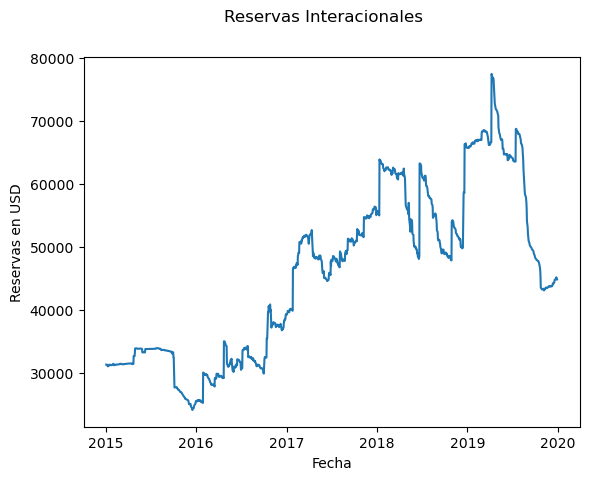

In [14]:
s = final_df.drop(['idVariable'], axis=1)
s.fecha = pd.to_datetime(s['fecha'])
plt.figure().suptitle('Reservas Interacionales')
plt.xlabel('Fecha')
plt.ylabel('Reservas en USD')
plt.plot(s.fecha, s.valor)



In [17]:
# Función para construir la URL con el año dado
def build_url(year):
    return f'https://api.bcra.gob.ar/estadisticas/v2.0/datosvariable/4/{year}-01-01/{year}-12-31'

# Lista para almacenar los DataFrames de cada año
dataframes = []

# Iterar sobre los años desde 2000 hasta 2024
for year in range(2020, 2025):
    # Construir la URL para el año actual
    url = build_url(year)
    
    # Realizar la solicitud GET
    response = requests.get(url, verify=False)
    
    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Obtener los datos JSON
        json_data = response.json()
        
        # Extraer la clave 'results' si existe
        if 'results' in json_data:
            results_data = json_data['results']
            
            # Crear un DataFrame a partir de los datos en 'results'
            df = pd.DataFrame(results_data)
            
            # Agregar el DataFrame a la lista
            dataframes.append(df)
        else:
            print(f"La clave 'results' no se encuentra en el JSON para el año {year}.")
    else:
        print(f"Error en la solicitud para el año {year}: {response.status_code}")

# Concatenar todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame final
print(final_df)


c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\anaconda3\

      idVariable       fecha    valor
0              4  2020-01-02    63.00
1              4  2020-01-03    62.98
2              4  2020-01-06    62.99
3              4  2020-01-07    62.99
4              4  2020-01-08    62.99
...          ...         ...      ...
1209           4  2024-12-19  1051.66
1210           4  2024-12-20  1054.27
1211           4  2024-12-23  1055.07
1212           4  2024-12-26  1055.82
1213           4  2024-12-27  1057.97

[1214 rows x 3 columns]


c:\Users\maria\anaconda3\envs\UCEMA\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


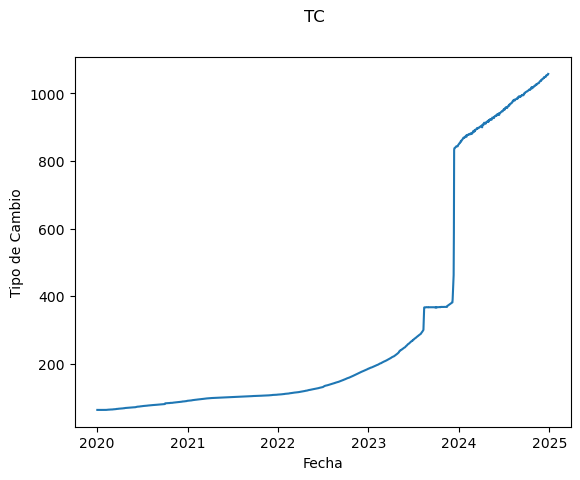

In [19]:
s = final_df.drop(['idVariable'], axis=1)
s.fecha = pd.to_datetime(s['fecha'])
plt.figure().suptitle('TC')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio')
plt.plot(s.fecha, s.valor)


In [6]:
# Función para construir la URL con el año dado
def build_url(year):
    return f'https://api.bcra.gob.ar/estadisticas/v2.0/datosvariable/26/{year}-01-01/{year}-12-31'

# Lista para almacenar los DataFrames de cada año
dataframes = []

# Iterar sobre los años desde 2000 hasta 2025
for year in range(2015, 2026):
    # Construir la URL para el año actual
    url = build_url(year)
    
    # Realizar la solicitud GET
    response = requests.get(url, verify=False)
    
    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Obtener los datos JSON
        json_data = response.json()
        
        # Extraer la clave 'results' si existe
        if 'results' in json_data:
            results_data = json_data['results']
            
            # Crear un DataFrame a partir de los datos en 'results'
            df = pd.DataFrame(results_data)
            
            # Agregar el DataFrame a la lista
            dataframes.append(df)
        else:
            print(f"La clave 'results' no se encuentra en el JSON para el año {year}.")
    else:
        print(f"Error en la solicitud para el año {year}: {response.status_code}")

# Concatenar todos los DataFrames en uno solo
final_df = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame final
print(final_df)


c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warn

      idVariable       fecha       valor
0             26  2015-01-02    597292.0
1             26  2015-01-05    595229.0
2             26  2015-01-06    594904.0
3             26  2015-01-07    596185.0
4             26  2015-01-08    596079.0
...          ...         ...         ...
2487          26  2025-03-17  75598211.0
2488          26  2025-03-18  76097289.0
2489          26  2025-03-19  76592567.0
2490          26  2025-03-20  76927174.0
2491          26  2025-03-21  77536468.0

[2492 rows x 3 columns]


c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


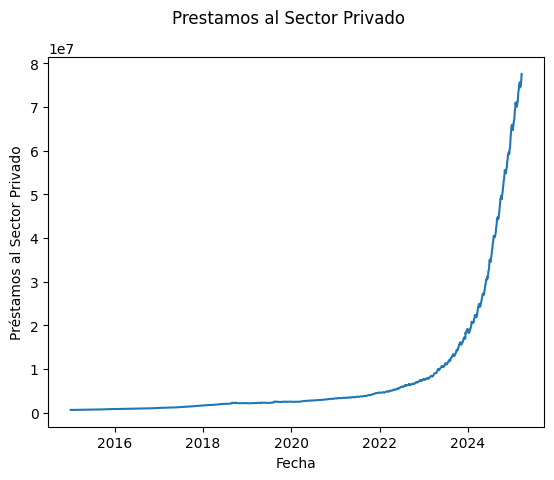

In [9]:
s = final_df.drop(['idVariable'], axis=1)
s.fecha = pd.to_datetime(s['fecha'])
plt.figure().suptitle('Prestamos al Sector Privado')
plt.xlabel('Fecha')
plt.ylabel('Préstamos al Sector Privado')
plt.plot(s.fecha, s.valor)

In [10]:
final_df['valor_diff'] = final_df['valor'].diff()
final_df['pct_change'] = final_df['valor'].pct_change()
final_df[['fecha', 'valor', 'valor_diff', 'pct_change']]

,fecha,valor,valor_diff,pct_change
0,2015-01-02,597292.0,NaN,NaN
1,2015-01-05,595229.0,-2063.0,-0.003454
2,2015-01-06,594904.0,-325.0,-0.000546
3,2015-01-07,596185.0,1281.0,0.002153
4,2015-01-08,596079.0,-106.0,-0.000178
...,...,...,...,...
2487,2025-03-17,75598211.0,364620.0,0.004847
2488,2025-03-18,76097289.0,499078.0,0.006602
2489,2025-03-19,76592567.0,495278.0,0.006508
2490,2025-03-20,76927174.0,334607.0,0.004369


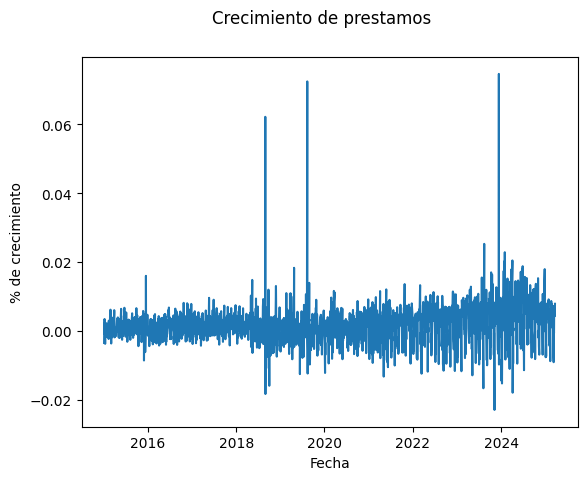

In [11]:
s = final_df.drop(['idVariable'], axis=1)
s.fecha = pd.to_datetime(s['fecha'])
plt.figure().suptitle('Crecimiento de prestamos')
plt.xlabel('Fecha')
plt.ylabel('% de crecimiento')
plt.plot(s.fecha, s['pct_change'])

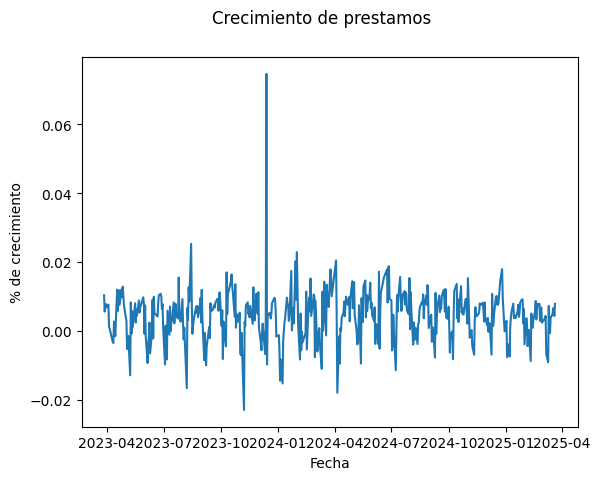

In [12]:

# Filtrar el DataFrame para incluir solo los últimos dos años
fecha_limite = pd.Timestamp.now() - pd.DateOffset(years=2)  # Fecha de hace 2 años
s = final_df.drop(['idVariable'], axis=1)
s['fecha'] = pd.to_datetime(s['fecha'])  # Asegurarse de que la columna 'fecha' sea de tipo datetime
s_filtrado = s[s['fecha'] >= fecha_limite]  # Filtrar las filas con fecha mayor o igual a la fecha límite

# Graficar los datos filtrados
plt.figure().suptitle('Crecimiento de prestamos')
plt.xlabel('Fecha')
plt.ylabel('% de crecimiento')
plt.plot(s_filtrado['fecha'], s_filtrado['pct_change'])
plt.show()

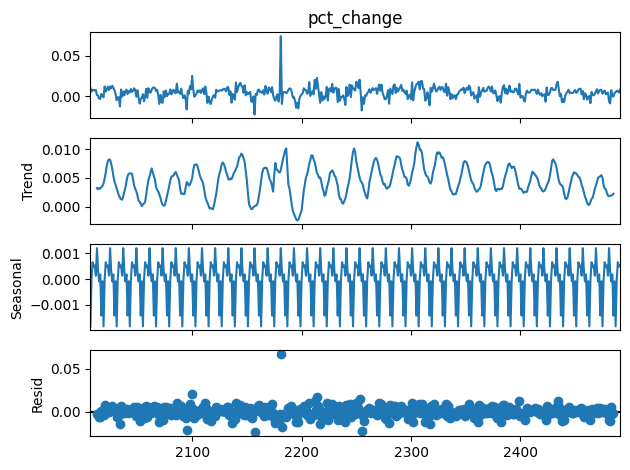

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
descomposicion = seasonal_decompose(s_filtrado['pct_change'], model='additive', period=12)
descomposicion.plot()
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_16728\3210508896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_filtrado['pct_change_diff'] = s_filtrado['pct_change'].diff()


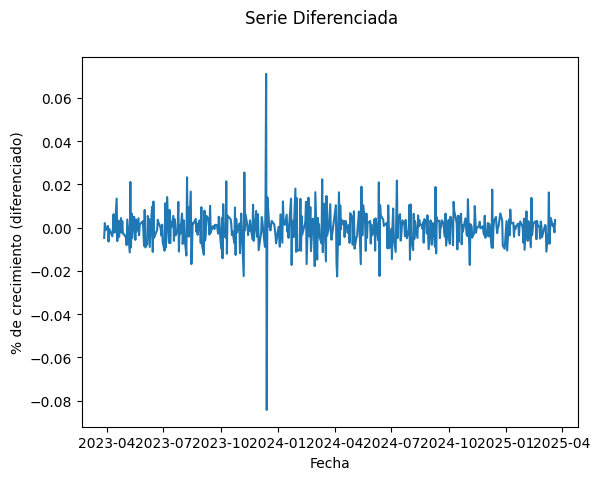

In [14]:
# Diferenciación para eliminar tendencia
s_filtrado['pct_change_diff'] = s_filtrado['pct_change'].diff()

# Graficar la serie diferenciada
plt.figure().suptitle('Serie Diferenciada')
plt.plot(s_filtrado['fecha'], s_filtrado['pct_change_diff'])
plt.xlabel('Fecha')
plt.ylabel('% de crecimiento (diferenciado)')
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(s_filtrado['pct_change_diff'].dropna())
print(f"Estadístico ADF: {resultado_adf[0]}")
print(f"p-valor: {resultado_adf[1]}")
print("La serie es estacionaria" if resultado_adf[1] < 0.05 else "La serie no es estacionaria")

Estadístico ADF: -12.646855070820802
p-valor: 1.395661507037178e-23
La serie es estacionaria


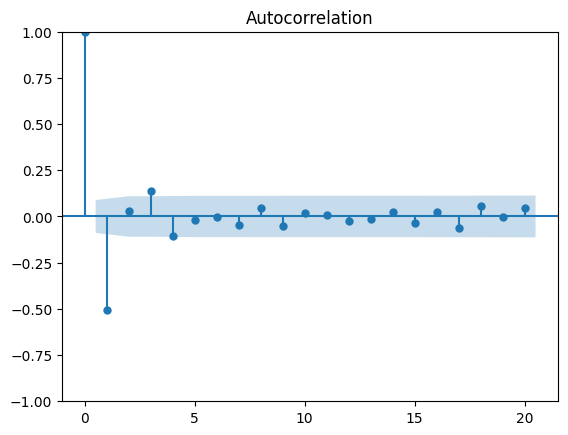

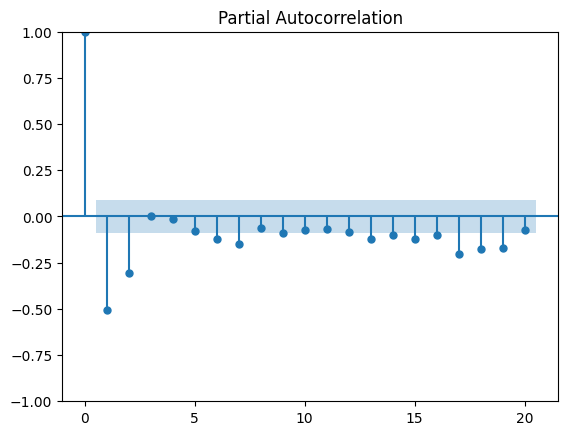

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plot_acf(s_filtrado['pct_change_diff'].dropna(), lags=20)
plt.show()

plot_pacf(s_filtrado['pct_change_diff'].dropna(), lags=20)
plt.show()

c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                  485
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1692.387
Date:                Wed, 26 Mar 2025   AIC                          -3378.773
Time:                        20:12:33   BIC                          -3366.227
Sample:                             0   HQIC                         -3373.843
                                - 485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1857      0.048     -3.846      0.000      -0.280      -0.091
ma.L1         -0.4752      0.050     -9.594      0.000      -0.572      -0.378
sigma2       5.37e-05   1.01e-06     53.092      0.0

c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\maria\AppData\Local\Temp\ipykernel_16728\3472122959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_filtrado['predicciones'] = resultado.predict(start=2, end=len(s_filtrado['pct_change']), 

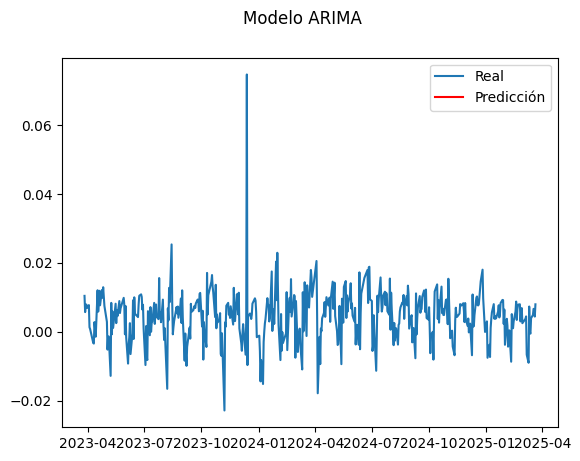

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARIMA
modelo = ARIMA(s_filtrado['pct_change'], order=(1, 1, 1))  # Cambia (p, d, q) según corresponda
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

# Graficar las predicciones
s_filtrado['predicciones'] = resultado.predict(start=2, end=len(s_filtrado['pct_change']), dynamic=False)
plt.figure().suptitle('Modelo ARIMA')
plt.plot(s_filtrado['fecha'], s_filtrado['pct_change'], label='Real')
plt.plot(s_filtrado['fecha'], s_filtrado['predicciones'], label='Predicción', color='red')
plt.legend()
plt.show()

c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\maria\Documents\GitHub\UCEMA\UCEMA_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\maria\AppData\Local\Temp\ipykernel_16728\4153654190.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(s_filtrado['fecha'].iloc[-1], periods=12, freq='M'), predicciones_futuras, label='Proyección', color='green')


485    0.006039
486    0.006388
487    0.006323
488    0.006335
489    0.006333
490    0.006334
491    0.006334
492    0.006334
493    0.006334
494    0.006334
495    0.006334
496    0.006334
Name: predicted_mean, dtype: float64


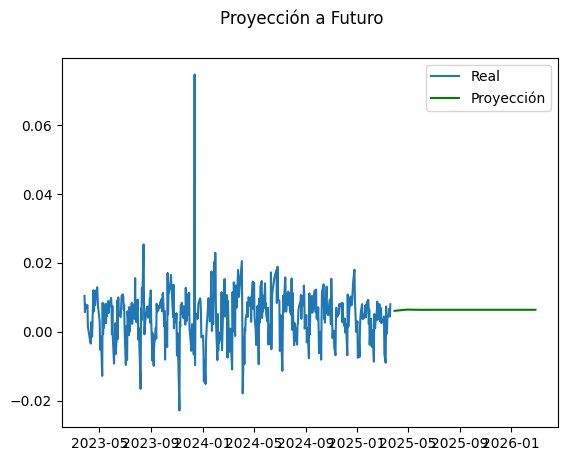

In [18]:
# Predicción a futuro
predicciones_futuras = resultado.forecast(steps=12)  # Proyectar 12 meses hacia adelante
print(predicciones_futuras)

# Graficar las predicciones futuras
plt.figure().suptitle('Proyección a Futuro')
plt.plot(s_filtrado['fecha'], s_filtrado['pct_change'], label='Real')
plt.plot(pd.date_range(s_filtrado['fecha'].iloc[-1], periods=12, freq='M'), predicciones_futuras, label='Proyección', color='green')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular métricas de error
mae = mean_absolute_error(s_filtrado['pct_change'].iloc[2:], s_filtrado['predicciones'].iloc[2:])
rmse = mean_squared_error(s_filtrado['pct_change'].iloc[2:], s_filtrado['predicciones'].iloc[2:], squared=False)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

ValueError: Input contains NaN.